# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Sammie Bever
https://github.com/s520250/BeverModule7FinalProject

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

# Question 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
import requests
from bs4 import BeautifulSoup

article_page = requests.get('https://www.parents.com/baby/care/american-baby-how-tos/newborn-baby-boot-camp/')
article_html = article_page.text
    
with open('file.html', 'w', encoding ="utf-8") as file:
    file.write(article_page.text)

# Question 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [2]:
# read in article from file created in question 1
with open('file.html', 'r', encoding='utf-8') as f:
    article_page = f.read()
file = BeautifulSoup(article_page, 'html5lib')

#to remove miscellaneous junk from extracted article text
for data in file(['style','script']):
    data.decompose()

article_content = file.find('article')

print("Article Content:")
print(article_content.get_text())
print()
print()
print()

# do sentiment analysis
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')

nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())
print(f'Polarity Score of Newborn Care Article: {doc._.polarity}')

# print the number of sentences in the original article
sentences = list(doc.sents)
for sentence in sentences:
    count =+ 1
    for item in file.find('article'):
        item.get_text("\n", strip=True)
sent_str = str(sentences).replace('\n','').replace('  ',' ')
print("Sentence count:", len(sentences))

Article Content:





Babies





Newborn Care





Baby Care Basics




What New Parents Need to Know About Taking Care of a Newborn

Every new parent needs some help. Here's everything you need to know about your newborn from sleeping to feeding and crying and pooping.




By

Lisa Milbrand








 

Lisa Milbrand


Lisa Milbrand is a copy writer for Real Simple, with a passion for writing about food, travel, and hacks to make life easier. Loves fancy restaurants, good coffee and her family (of course); not a fan of waiting in lines.



our editorial guidelines




Updated on September 8, 2022









Share







Tweet







Pin







Email














 

Photo: Kseniia Zagrebaeva/Shutterstock





You've no doubt been dreaming about your baby for months: what they'll look like, what they'll sound like, and even what they'll feel like. But chances are, you'll welcome tips for taking care of a newborn—especially if it's your first child.



Well, take heart. Lots of parents hav

# Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [3]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

# get rid of punctuation and whitespaces
def we_care_about(token):
    return not (token.is_space or token.is_punct)

interesting_tokens = [token for token in doc if we_care_about(token)]

# count the most frequent terms
from collections import Counter
word_freq = Counter(map(str,interesting_tokens))

# remove stopwords
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# converted to lower case, counted tokens, and printed list
interesting_tokens = [str(token).lower() for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print("Most Common Tokens with Counts", word_freq.most_common(5))

# store top 5 tokens in a set
top5tokens = set()
for token, freq in word_freq.most_common(5):
    top5tokens.add(token)
print("Most Common Tokens:", top5tokens)

Most Common Tokens with Counts [('baby', 62), ('care', 18), ('babies', 17), ('newborn', 17), ('sleep', 16)]
Most Common Tokens: {'sleep', 'newborn', 'babies', 'care', 'baby'}


# Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [4]:
for sentence in sentences:
    sent_str = str(sentence).replace('\n','').replace('  ',' ')

# Changed to lemmas, lower case, counted lemmas, and printed list
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print("Most Common Lemmas:", lemma_freq.most_common(5))

# store top 5 lemmas in a set
top5lemmas = set()
for token, freq in lemma_freq.most_common(5):
    top5lemmas.add(token)
print("Most Common Lemmas:", top5lemmas)

Most Common Lemmas: [('baby', 77), ('newborn', 27), ('sleep', 21), ('care', 19), ('tip', 16)]
Most Common Lemmas: {'tip', 'sleep', 'newborn', 'care', 'baby'}


# Question 5

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[0.2916666666666667, 0.05555555555555555, 0.0, 0.0, 0.022727272727272728, 0.1, 0.0, 0.08695652173913043, 0.05263157894736842, 0.0, 0.03571428571428571, 0.0, 0.038461538461538464, 0.3333333333333333, 0.0, 0.0, 0.0, 0.02702702702702703, 0.0, 0.05263157894736842, 0.047619047619047616, 0.0, 0.09090909090909091, 0.03571428571428571, 0.0, 0.0, 0.07142857142857142, 0.0, 0, 0.0, 0.034482758620689655, 0.0, 0.0, 0.05555555555555555, 0.125, 0.0, 0.05, 0.0, 0.022727272727272728, 0.0, 0, 0.025, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.0, 0.058823529411764705, 0.0, 0.023809523809523808, 0.0, 0.0, 0.0, 0.0, 0.05263157894736842, 0.0, 0.0, 0, 0.15789473684210525, 0.047619047619047616, 0.08333333333333333, 0.1111111111111111, 0.13636363636363635, 0.043478260869565216, 0.0, 0.5, 0.0, 0.0, 0.0, 0.15789473684210525, 0.07692307692307693, 0.1, 0.0, 0.08333333333333333, 0.0, 0, 0.06666666666666667, 0.038461538461538464, 0.5, 0

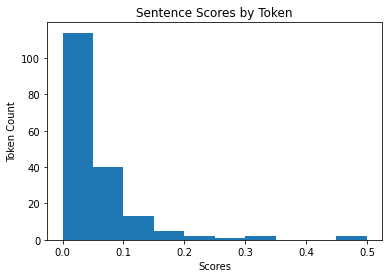

In [5]:
import matplotlib.pyplot as plt
sentences = list(doc.sents)

def sent_len(sent):
    count = 0
    for token in sent:
        if not(token.is_space or token.is_punct):
            count += 1
    return count

def score_sentence_by_token(sent, top5tokens):
    count = 0
    if sent_len(sent) == 0:
        return 0
    for token in sent:
        if str(token).lower() in top5tokens:
            count += 1
    return count/sent_len(sent)

# make a list of token scores
token_scores = []

for sentence in sentences:
    token_scores.append(score_sentence_by_token(sentence, top5tokens))
print(token_scores)

# plot histogram
plt.hist(token_scores)
plt.title('Sentence Scores by Token')
plt.xlabel('Scores')
plt.ylabel('Token Count')
plt.show()

# The most common range of scores (using tokens) appears to be 0.0 to 0.05

# Question 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[0.25, 0.05555555555555555, 0.0, 0.0, 0.022727272727272728, 0.1, 0.0, 0.08695652173913043, 0.05263157894736842, 0.0, 0.03571428571428571, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.02702702702702703, 0.0, 0.05263157894736842, 0.047619047619047616, 0.0, 0.09090909090909091, 0.03571428571428571, 0.0, 0.0, 0.07142857142857142, 0.0, 0, 0.0, 0.034482758620689655, 0.0, 0.0, 0.05555555555555555, 0.125, 0.0, 0.05, 0.0, 0.022727272727272728, 0.0, 0, 0.025, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.0, 0.05555555555555555, 0.0, 0.05555555555555555, 0.0, 0.0, 0.0, 0.023809523809523808, 0.0, 0.0, 0.0, 0.0, 0.05263157894736842, 0.0, 0.0, 0, 0.15789473684210525, 0.047619047619047616, 0.08333333333333333, 0.1111111111111111, 0.18181818181818182, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.21052631578947367, 0.07692307692307693, 0.0, 0.0, 0.16666666666666666, 0.0, 0, 0.06666666666666667, 0.038461538461538464, 1.0, 0.16666666666666666, 0.0, 0.0, 0.0, 0.11764705882352941, 0.0, 0.0,

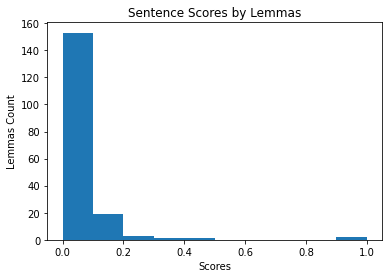

In [6]:
def sent_len(sent):
    count = 0
    for token in sent:
        if not(token.is_space or token.is_punct):
            count += 1
    return count

def score_sentence_by_lemmas(sent, top5lemmas):
    count = 0
    if sent_len(sent) == 0:
        return 0
    for token in sent:
        if str(token).lower() in top5lemmas:
            count += 1
    return count/sent_len(sent)

# make a list of lemma scores
lemmas_scores = []

for sentence in sentences:
    lemmas_scores.append(score_sentence_by_lemmas(sentence, top5lemmas))
print(lemmas_scores)

# plot histogram
plt.hist(lemmas_scores)
plt.title('Sentence Scores by Lemmas')
plt.xlabel('Scores')
plt.ylabel('Lemmas Count')
plt.show()

# The most common range of scores (using lemmas) appears to be 0.0 to 0.1

# Question 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.16
* Cutoff Score (lemmas): 0.18

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

# Question 8

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [7]:
token_summary = []
token_cutoff = 0.16
for sentence in sentences:
    if(score_sentence_by_token(sentence, top5tokens)>token_cutoff):
        token_summary.append(str(sentence))
print(' '.join(token_summary))






Babies





Newborn Care





Baby Care Basics




What New Parents Need to Know About Taking Care of a Newborn

Every new parent needs some help. So dress your newborn with care. Care tip: Care tip: Use baby nail clippers or blunt-nosed scissors made for baby nails. Care tip: Change diapers frequently. Newborn Sleep  

Newborns don't come into the world with adult-friendly sleep habits. Sleep training  

While sleep training may be OK for some older babies, it's not a good idea for newborns and younger babies. (Babies love motion!)






# Question 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [8]:
# polarity score of summary using tokens
token_summary_text = (' '.join(token_summary))
doc2 = nlp(token_summary_text)
print(f'Polarity of Newborn Care Token Summary: {doc2._.polarity}')
print(f'Token Summary Number of Sentences:', len(token_summary))

Polarity of Newborn Care Token Summary: 0.16429924242424243
Token Summary Number of Sentences: 9


# Question 10

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [9]:
lemmas_summary = []
lemmas_cutoff = 0.18
for sentence in sentences:
    if(score_sentence_by_lemmas(sentence, top5lemmas)>lemmas_cutoff):
        lemmas_summary.append(str(sentence))
print(' '.join(lemmas_summary))






Babies





Newborn Care





Baby Care Basics




What New Parents Need to Know About Taking Care of a Newborn

Every new parent needs some help. So dress your newborn with care. Care tip: Wash your baby's face and neck daily with lukewarm water or a mild baby soap and a soft washcloth.


   Care tip: Care tip: Wash your baby's hair with a gentle baby shampoo no more than three times a week. Care tip: Care tip: Change diapers frequently. Care tip: Gently clean the genital area with warm water daily. Newborn Sleep  

Newborns don't come into the world with adult-friendly sleep habits.


# Question 11

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [10]:
# polarity score of summary using lemmas
lemmas_summary_text = (' '.join(lemmas_summary))
doc3 = nlp(lemmas_summary_text)
print(f'Polarity of Newborn Care Lemmas Summary: {doc3._.polarity}')
print(f'Lemmas Summary Number of Sentences:', len(lemmas_summary))

Polarity of Newborn Care Lemmas Summary: 0.15661157024793387
Lemmas Summary Number of Sentences: 9


# Question 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

I have printed the polarity scores below for the article and both summaries. There is a difference between all of the polarity scores. The summaries seem to score more positive than the full article, with the token summary scoring the most positive. I bet this is because we used a different set of words to test the polarity from. The article seems to be mostly informational and neutral, but it also talks about how new parents might struggle or be nervous at first. It also talks about how parents are likely excited for their newborn. So I think the polarity score of the article is accurate because it balances out to be mostly neutral, but slightly on the positive side. In the summaries, there are significantly less words than the original article, so they are probably not as accurate of a reading as the polarity score of the full article.

In [11]:
print(f'Polarity of Newborn Care Full Article: {doc._.polarity}')
print(f'Polarity of Newborn Care Token Summary: {doc2._.polarity}')
print(f'Polarity of Newborn Care Lemmas Summary: {doc3._.polarity}')

Polarity of Newborn Care Full Article: 0.11687166999667008
Polarity of Newborn Care Token Summary: 0.16429924242424243
Polarity of Newborn Care Lemmas Summary: 0.15661157024793387


# Question 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

I don't particlarly think that either summary was a very accurate summary of the full article. The article covered so much more than just bathing and sleep habits for newborns, but this is mostly what the summary provided. I would guess that lemmas typically do better at providing summaries because they use the basewords. 